In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
#Load the data into a dataframe
df = pd.read_csv('train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
# Step1: understand the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
#De noising
from scipy import stats
# Calculate the Z-scores
z_scores = stats.zscore(df['Purchase'])

In [5]:
z_scores.head(20)

0    -0.177973
1     1.181756
2    -1.561193
3    -1.633858
4    -0.257805
5     1.187131
6     1.981069
7     1.311955
8     1.278510
9    -0.277315
10   -0.798312
11   -1.056521
12   -0.635264
13    1.274329
14   -0.773626
15   -1.430397
16    0.754725
17   -0.082215
18    0.502489
19    2.060503
Name: Purchase, dtype: float64

In [6]:
# Define a threshold for identifying outliers
threshold = 2.9

# Identify outliers
outliers = (z_scores > threshold) | (z_scores < -threshold)


In [7]:
# Print the indices of the outliers
print("Indices of outliers:")
print(df.index[outliers])

Indices of outliers:
Int64Index([  6543,   6585,   6911,   7542,   9201,  13013,  16441,  17304,
             17641,  18915,
            ...
            525565, 526271, 526317, 526951, 536807, 540711, 541477, 541705,
            543136, 543995],
           dtype='int64', length=305)


In [8]:


# Example: Remove outliers from the 'Purchase' column based on the threshold
df = df[np.abs(df['Purchase'] - df['Purchase'].mean()) <= threshold * df['Purchase'].std()]


In [9]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [10]:
#Remove collinearity
#Objective: Address multicollinearity, where predictor variables are highly correlated.

#Example: Drop Highly Correlated Features

# Example: Drop highly correlated features with a correlation threshold of 0.8
correlation_matrix = df.corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]
df = df.drop(columns=to_drop)

df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


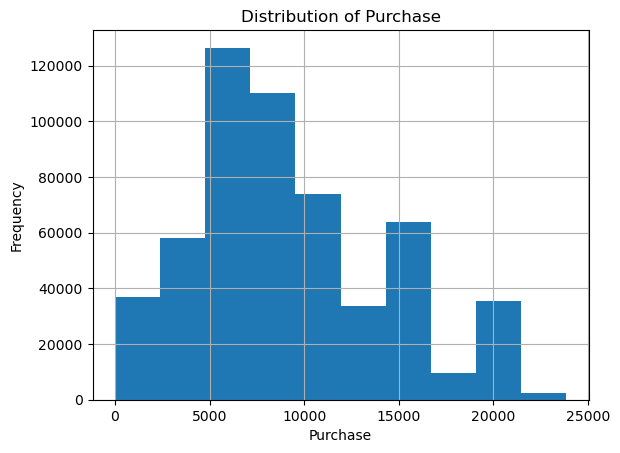

In [11]:
#3. Evaluating Distribution:

# Example: Visualize the distribution of the 'Purchase' column
df['Purchase'].hist()
plt.xlabel('Purchase')
plt.ylabel('Frequency')
plt.title('Distribution of Purchase')
plt.show()


In [12]:
#4.Scaling
#Standardization of the features

#from sklearn.preprocessing import StandardScaler

# Example: Standardize numerical features
#scaler = StandardScaler()
#numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
#df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

#df


In [13]:
#Feature Extraction

In [14]:

# Assuming df is your DataFrame
frequency_encoding = df['Product_ID'].value_counts(normalize=True)
df['Product_ID_Frequency_Encoded'] = df['Product_ID'].map(frequency_encoding)



In [15]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_ID_Frequency_Encoded
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,0.000413
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,0.001057
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,0.000186
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,0.000620
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,0.000369
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368,0.001522
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371,0.001481
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137,0.001481
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365,0.001481


In [16]:
# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum()

In [17]:
# Display columns with missing values and their percentages
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_info = missing_info[missing_info['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)


In [18]:
print("Columns with missing values:")
print(missing_info)

Columns with missing values:
                    Missing Values  Percentage
Product_Category_3          383031   69.672022
Product_Category_2          173609   31.578880


In [19]:
# Decide on a threshold for missing values (e.g., 5%)
missing_threshold = 70
 
    
#Handle missing values based on the threshold
for column in missing_info.index:
    if missing_info.loc[column, 'Percentage'] <= missing_threshold:
        # Impute missing values for columns with a low percentage of missing values
        df[column].fillna(df[column].mean(), inplace=True)
    else:
        # Drop columns with a high percentage of missing values
        df.drop(column, axis=1, inplace=True)

# For rows with missing values, you can choose to drop them entirely
df.dropna(inplace=True)

# Verify that there are no more missing values
print("\nAfter handling missing values:")
print(df.isnull().sum())


After handling missing values:
User_ID                         0
Product_ID                      0
Gender                          0
Age                             0
Occupation                      0
City_Category                   0
Stay_In_Current_City_Years      0
Marital_Status                  0
Product_Category_1              0
Product_Category_2              0
Product_Category_3              0
Purchase                        0
Product_ID_Frequency_Encoded    0
dtype: int64


In [20]:
#user_mean_purchase = df.groupby('User_ID')['Purchase'].mean().reset_index()
#user_mean_purchase.columns = ['User_ID', 'Avg_Purchase_Per_User']
#df = pd.merge(df, user_mean_purchase, on='User_ID', how='left')


In [21]:
# Assuming 'User_ID' and 'Product_ID' are relevant columns
num_unique_products_per_user = df.groupby('User_ID')['Product_ID'].nunique()
df['Num_Unique_Products_Per_User'] = df['User_ID'].map(num_unique_products_per_user)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_ID_Frequency_Encoded,Num_Unique_Products_Per_User
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.839069,12.666465,8370,0.000413,35
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,14.000000,15200,0.001057,35
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.839069,12.666465,1422,0.000186,35
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,12.666465,1057,0.000620,35
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.839069,12.666465,7969,0.000369,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,9.839069,12.666465,368,0.001522,36
550064,1006035,P00375436,F,26-35,1,C,3,0,20,9.839069,12.666465,371,0.001481,152
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,9.839069,12.666465,137,0.001481,514
550066,1006038,P00375436,F,55+,1,C,2,0,20,9.839069,12.666465,365,0.001481,12


In [22]:
#Binary encoding of the Gender, since it has only two values

df['Gender'] = df['Gender'].replace({'F':0, 'M':1})

df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_ID_Frequency_Encoded,Num_Unique_Products_Per_User
0,1000001,P00069042,0,0-17,10,A,2,0,3,9.839069,12.666465,8370,0.000413,35
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.000000,14.000000,15200,0.001057,35
2,1000001,P00087842,0,0-17,10,A,2,0,12,9.839069,12.666465,1422,0.000186,35
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.000000,12.666465,1057,0.000620,35
4,1000002,P00285442,1,55+,16,C,4+,0,8,9.839069,12.666465,7969,0.000369,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,51-55,13,B,1,1,20,9.839069,12.666465,368,0.001522,36
550064,1006035,P00375436,0,26-35,1,C,3,0,20,9.839069,12.666465,371,0.001481,152
550065,1006036,P00375436,0,26-35,15,B,4+,1,20,9.839069,12.666465,137,0.001481,514
550066,1006038,P00375436,0,55+,1,C,2,0,20,9.839069,12.666465,365,0.001481,12


In [23]:
#encode ordinal features like Age in the order using Dict mapping

age = {'0-17':1, 
         '18-25':2, 
         '26-35':3, 
         '36-45':4, 
         '46-50':5,
         '51-55':6,
         '55+':7}
df['Age'] = df.Age.map(age)


In [24]:
years ={'0':0,
        '1':1,
        '2':2,
        '3':3,
        '4+':4
       }

df['Stay_In_Current_City_Years'] = df.Stay_In_Current_City_Years.map(years)

df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_ID_Frequency_Encoded,Num_Unique_Products_Per_User
0,1000001,P00069042,0,1,10,A,2,0,3,9.839069,12.666465,8370,0.000413,35
1,1000001,P00248942,0,1,10,A,2,0,1,6.000000,14.000000,15200,0.001057,35
2,1000001,P00087842,0,1,10,A,2,0,12,9.839069,12.666465,1422,0.000186,35
3,1000001,P00085442,0,1,10,A,2,0,12,14.000000,12.666465,1057,0.000620,35
4,1000002,P00285442,1,7,16,C,4,0,8,9.839069,12.666465,7969,0.000369,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,6,13,B,1,1,20,9.839069,12.666465,368,0.001522,36
550064,1006035,P00375436,0,3,1,C,3,0,20,9.839069,12.666465,371,0.001481,152
550065,1006036,P00375436,0,3,15,B,4,1,20,9.839069,12.666465,137,0.001481,514
550066,1006038,P00375436,0,7,1,C,2,0,20,9.839069,12.666465,365,0.001481,12


In [25]:
City_Category = {'A':1, 
                 'C':2, 
                 'B':3}

df['City_Category'] = df.City_Category.map(City_Category)

In [26]:
# Assuming 'Age' and 'City_Category' are relevant columns
df['Age_City_Category_Interaction'] = df['Age'] * df['City_Category']


In [27]:

# Step3: Extract feature set for Regression


X = df.drop(columns=['User_ID', 'Product_ID','Purchase'])
y = df['Purchase']

In [28]:
#Step4: Traing and Testing

#Split the data into train and test data
from sklearn.model_selection import cross_val_score, train_test_split

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
print("Training set size=",X_train.shape[0], "Testing set size=",X_test.shape[0])

Training set size= 384834 Testing set size= 164929


In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

In [30]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Assuming you have X_train_scaled, y_train, X_test_scaled, y_test

# Define the LSTM model for regression
model = Sequential()

model.add(LSTM(50, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model.add(Dense(1, activation='linear'))  # Linear activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [32]:
# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=2)

# Evaluate the model
y_pred = model.predict(X_test_scaled)


Epoch 1/100

9621/9621 - 59s - loss: 22116892.0000 - val_loss: 26116864.0000 - 59s/epoch - 6ms/step
Epoch 2/100
9621/9621 - 59s - loss: 19663460.0000 - val_loss: 18043590.0000 - 59s/epoch - 6ms/step
Epoch 3/100
9621/9621 - 62s - loss: 17803652.0000 - val_loss: 16130613.0000 - 62s/epoch - 6ms/step
Epoch 4/100
9621/9621 - 58s - loss: 17143670.0000 - val_loss: 18170778.0000 - 58s/epoch - 6ms/step
Epoch 5/100
9621/9621 - 55s - loss: 15943870.0000 - val_loss: 14962776.0000 - 55s/epoch - 6ms/step
Epoch 6/100
9621/9621 - 65s - loss: 14301189.0000 - val_loss: 14050516.0000 - 65s/epoch - 7ms/step
Epoch 7/100
9621/9621 - 64s - loss: 14083916.0000 - val_loss: 13827490.0000 - 64s/epoch - 7ms/step
Epoch 8/100
9621/9621 - 59s - loss: 14324917.0000 - val_loss: 13771002.0000 - 59s/epoch - 6ms/step
Epoch 9/100
9621/9621 - 55s - loss: 19001276.0000 - val_loss: 18771682.0000 - 55s/epoch - 6ms/step
Epoch 10/100
9621/9621 - 56s - loss: 21002360.0000 - val_loss: 24281774.0000 - 56s/epoch - 6ms/step
Epoch 11

In [33]:
y_test_reshaped = np.array(y_test).reshape(-1, 1)
y_pred_reshaped = np.array(y_pred).reshape(-1, 1)

In [34]:
# Assuming y_test_reshaped is your reshaped target variable
y_test_inv_manual = (y_test_reshaped * scaler.scale_) + scaler.mean_

# Assuming y_pred_inv is your inverted predictions
y_pred_inv = (y_pred_reshaped * scaler.scale_) + scaler.mean_

In [35]:

# Calculate regression metrics
MAE_nn = mean_absolute_error(y_test_inv_manual, y_pred_inv)
MSE_nn = mean_squared_error(y_test_inv_manual, y_pred_inv)
MAPE_nn = mean_absolute_percentage_error(y_test_inv_manual, y_pred_inv)
R2lin_nn = r2_score(y_test_inv_manual, y_pred_inv)

print("Neural Network MAE=", MAE_nn, "Neural Network MSE=", MSE_nn, "Neural Network MAPE=", MAPE_nn, 'Neural Network R2 score=', R2lin_nn)


Neural Network MAE= 46637.30050365754 Neural Network MSE= 35385354120.27179 Neural Network MAPE= 1.2170570207507396 Neural Network R2 score= 0.45316897486674934
